In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Leer Datos

In [2]:
# Read data from file
data = pd.read_csv("../outp/dif.dat", sep=" ", header=None)
data.columns = ["t", "id", "x", "y", "vx", "vy"]
data.set_index("id", inplace=True)

#//print(data.index.unique().to_numpy())

dtmin = data.loc[0]["t"].to_numpy()[1] - data.loc[0]["t"].to_numpy()[0] 

data

,t,x,y,vx,vy
id,,,,,
0,0.0,0.000000,0.000000,0.000000,0.000000
0,0.1,0.038926,0.018319,0.375968,-2.010900
0,0.2,-0.089819,-0.437754,-1.812910,-5.089820
0,0.3,-0.175973,-0.746185,-1.998360,-0.847697
0,0.4,-0.205608,-0.724176,-1.512060,1.674500
...,...,...,...,...,...
0,99.6,-2.019390,-6.722090,1.494410,-1.088430
0,99.7,-2.091300,-6.639090,0.089225,1.822670
0,99.8,-1.877980,-6.289770,2.978420,1.490920


# Pruebas

Si se quieren hacer mas pruebas, porfavor comentarlas deaspues para evitar correr celdas innecesarias. Solo se deben quitar las comillas del comienzo

In [3]:
sigma = np.mean( np.power(data["vx"], 2) + np.power(data["vy"], 2) )
t = data.loc[0]["t"].to_numpy()[-1]

#comparar funciones de autocorrelacion
def autocorrelation_lib(t, df, denom): #< v(t) * v(t+dt) > / < v(t) * v(t) >
    shifts = np.arange(0, int(t/dtmin)+1, 1)
    autocorr = np.zeros(shifts.size)
    for i in shifts:
        autocorr[i] = np.nanmean( df["vx"] * df["vx"].shift(-i) + df["vy"] * df["vy"].shift(-i) ) / denom
    return autocorr

def autocorrelation_lib2(t,list, denom): #< v(t) * v(t+dt) > / < v(t) * v(t) > #modificado para que tener la misma forma que la funciuon de profe
    shifts = np.arange(0, int(t/dtmin)+1, 1)
    autocorr = np.zeros(shifts.size)
    for i in shifts:
        autocorr[i] = np.nanmean( list * list.shift(-i)) / denom
    return autocorr

def autocorrelation(dt, df): 
    v = np.sqrt(df["vx"]**2 + df["vy"]**2)
    n = len(v)
    result = np.correlate(v, v, mode='full')
    result = result[result.size // 2:] / np.arange(n, 0, -1)
    return result * dt  #! la funcion no debe depender de dt tan fuertemente

def autocorrelation2(dt, df):
    v = np.sqrt(df["vx"]**2 + df["vy"]**2)
    result = np.correlate(v, v, mode='full')
    result = result[result.size // 2:]
    return result

def autocorrelation_prof(array1, array2 ,denom, ilag):
    if ilag>0:
        return np.mean(array1[:-ilag] * array2[ilag:])/denom
    else:
        return np.mean(array1 * array2)/denom
#"""

1001 1001 1001 1001 1001


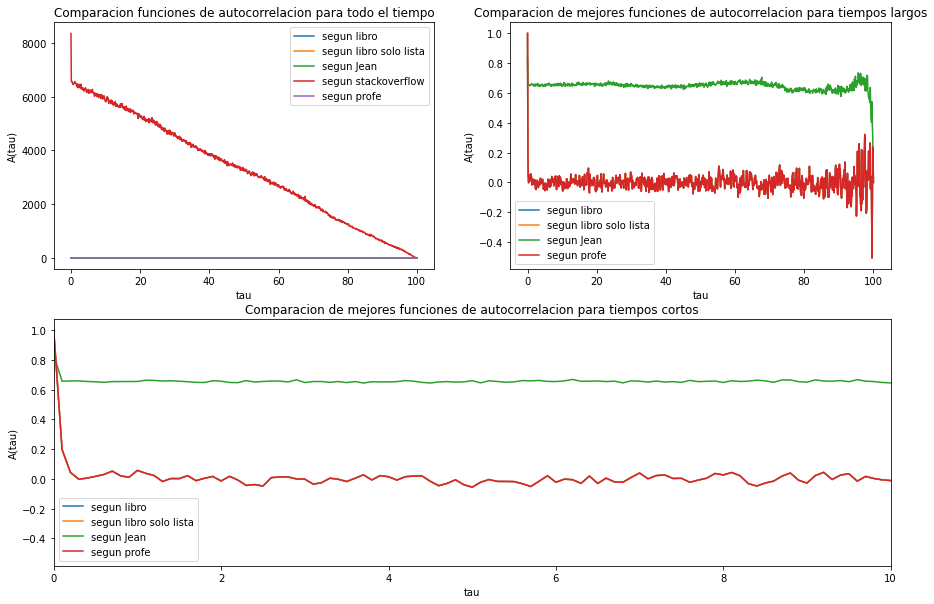

In [30]:

sigma = np.mean( np.power(data["vx"], 2) + np.power(data["vy"], 2) )
corr = autocorrelation_lib(t, data, sigma)

sigma = autocorrelation_lib2(0, data["vx"], 1.0)[0] + autocorrelation_lib2(0, data["vy"], 1.0)[0]
corr2 = autocorrelation_lib2(t, data["vx"], sigma) + autocorrelation_lib2(t, data["vy"], sigma)

corr3 = autocorrelation(dtmin, data)
corr4 = autocorrelation2(dtmin, data)

corr5 = np.zeros(data["vx"].size)
A0 = autocorrelation_prof(data["vx"], data["vx"], 1.0, 0) + autocorrelation_prof(data["vy"], data["vy"], 1.0, 0)
for i in range(data["vx"].size):
    corr5[i] = autocorrelation_prof(data["vx"], data["vx"], A0, i) + autocorrelation_prof(data["vy"], data["vy"], A0, i)

print(corr.size, corr2.size, corr3.size, corr4.size, corr5.size)

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(221)

ax1.plot(data["t"].unique(), corr, label="segun libro")
ax1.plot(data["t"].unique(), corr2, label="segun libro solo lista")
ax1.plot(data["t"].unique(), corr3, label="segun Jean")
ax1.plot(data["t"].unique(), corr5, label="segun profe")
ax1.set_xlabel("tau")
ax1.set_ylabel("A(tau)")
ax1.legend()
ax1.set_xlim(0,10)
ax1.set_title("Comparacion de mejores funciones de autocorrelacion para tiempos cortos")

ax2.plot(data["t"].unique(), corr, label="segun libro")
ax2.plot(data["t"].unique(), corr2, label="segun libro solo lista")
ax2.plot(data["t"].unique(), corr3, label="segun Jean")
ax2.plot(data["t"].unique(), corr5, label="segun profe")
ax2.set_xlabel("tau")
ax2.set_ylabel("A(tau)")
ax2.legend()
ax2.set_title("Comparacion de mejores funciones de autocorrelacion para tiempos largos")

ax3.plot(data["t"].unique(), corr, label="segun libro")
ax3.plot(data["t"].unique(), corr2, label="segun libro solo lista")
ax3.plot(data["t"].unique(), corr3, label="segun Jean")
ax3.plot(data["t"].unique(), corr4, label="segun stackoverflow")
ax3.plot(data["t"].unique(), corr5, label="segun profe")
ax3.set_xlabel("tau")
ax3.set_ylabel("A(tau)")
ax3.legend()
ax3.set_title("Comparacion funciones de autocorrelacion para todo el tiempo");

#plt.savefig("../outp/pruebas_autocorrelacion.png")
#"""

al parecer 3 devuelen un resultado muy similar, por lo tamto se puede utilizar cualqueira.
A continuacion veremos cual es mas eficiente

In [20]:

%%timeit -n 25 -r 5
sigma = np.mean( np.power(data["vx"], 2) + np.power(data["vy"], 2) )
corr = autocorrelation_lib(t, data, sigma)
#"""

537 ms ± 8.66 ms per loop (mean ± std. dev. of 5 runs, 25 loops each)


In [21]:

%%timeit -n 25 -r 5
sigma = autocorrelation_lib2(0, data["vx"], 1.0)[0] + autocorrelation_lib2(0, data["vy"], 1.0)[0]
corr2 = autocorrelation_lib2(t, data["vx"], sigma) + autocorrelation_lib2(t, data["vy"], sigma)
#"""

501 ms ± 14.4 ms per loop (mean ± std. dev. of 5 runs, 25 loops each)


In [31]:

%%timeit -n 25 -r 5
corr5 = np.zeros(data["vx"].size)
A0 = autocorrelation_prof(data["vx"], data["vx"], 1.0, 0) + autocorrelation_prof(data["vy"], data["vy"], 1.0, 0)
for i in range(data["vx"].size):
    corr5[i] = autocorrelation_prof(data["vx"], data["vx"], A0, i) + autocorrelation_prof(data["vy"], data["vy"], A0, i)
#"""

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/anprietoa/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_7850/2294572646.py", line 1, in <module>
    get_ipython().run_cell_magic('timeit', '-n 25 -r 5', 'corr5 = np.zeros(data["vx"].size)\nA0 = autocorrelation_prof(data["vx"], data["vx"], 1.0, 0) + autocorrelation_prof(data["vy"], data["vy"], 1.0, 0)\nfor i in range(data["vx"].size):\n    corr5[i] = autocorrelation_prof(data["vx"], data["vx"], A0, i) + autocorrelation_prof(data["vy"], data["vy"], A0, i)\n#"""\n')
  File "/home/anprietoa/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2517, in run_cell_magic
    result = fn(*args, **kwargs)
  File "/home/anprietoa/.local/lib/python3.10/site-packages/IPython/core/magics/execution.py", line 1189, in timeit
    all_runs = timer.repeat(repeat, number)
  File "/usr/lib/python3.10/timeit.py", 

En teoria la segunda implementacion, es un poco mas eficiente (implementacion del libro pero con las componenetes separadas)

# Gifs y graficas espaciales

Text(0, 0.5, 'y')

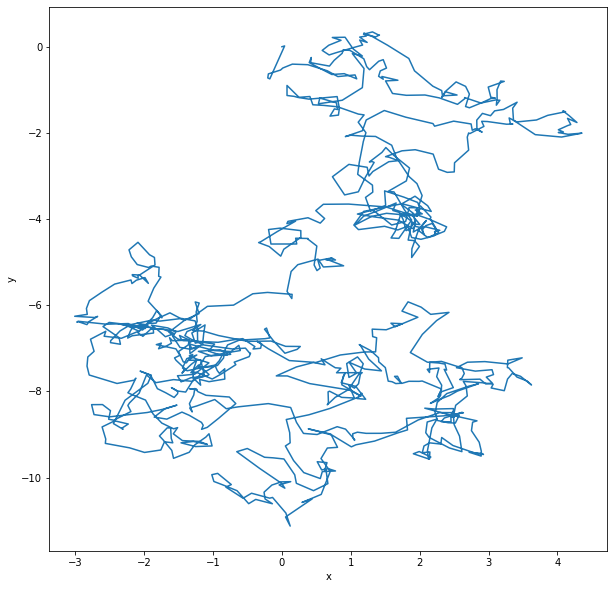

In [32]:
plt.figure(figsize=(10, 10))
for i in data.index.unique():
    plt.plot(data.loc[i]["x"].to_numpy(), data.loc[i]["y"].to_numpy(), label=f"orbita id={i}")
#plt.plot(data["x"].to_numpy(), data["y"].to_numpy(), label="xy")
#plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Movimiento de particulas en el espacio")

In [33]:
print(data.loc[0]["t"].to_numpy()[-1]/dtmin)

1000.0


In [27]:
#volver a ejecutar si se quiere cambiar el color
R = 1.0
col = np.random.uniform(0, 0.9, (len(data.index.unique()), 3))
print(np.shape(col))

dt = data.loc[0]["t"].to_numpy()[1] - data.loc[0]["t"].to_numpy()[0] 

delta = dt
Moleculas = data[(data["t"]/delta)==np.floor(data["t"]/delta)] #? lo implemente asi porque no me funcionaba con el modulo (data["t"]%delta==0)
#TODO: Mejorarlo para que no se pierdan cuadros en el proceso

cuadros = len(Moleculas.loc[0])
print(cuadros)

(1, 3)
653


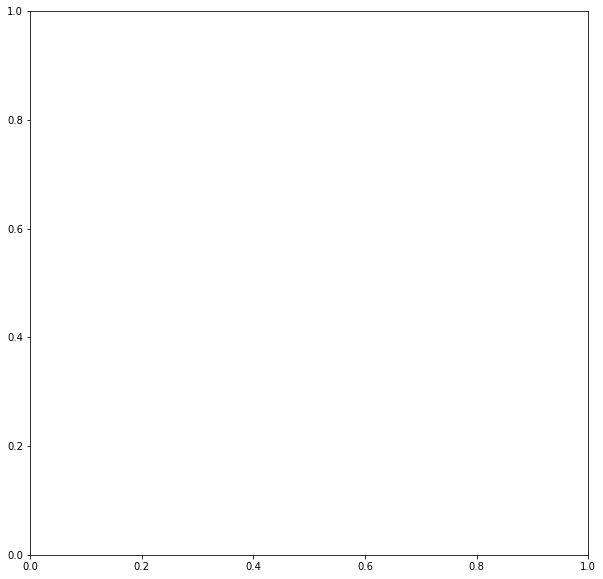

In [29]:
# Define the animation function
def animate(i):
    ax.clear()
    ax.set_aspect('equal')
    ax.set_xlim(-60,60)
    ax.set_ylim(-60,60)
    plt.xlabel("x")
    plt.ylabel("y")
    for j in data.index.unique():
        Molecula = Moleculas.loc[j]
        circle = plt.Circle((Molecula["x"].iloc[i], Molecula["y"].iloc[i]),  R, color=col[j], fill=True)
        ax.add_artist(circle)
    circle = plt.Circle((0, 0), 50, color="black", fill=False)
    ax.add_artist(circle)
    

# Create the animation
fig, ax = plt.subplots(figsize=(10, 10))
anim = animation.FuncAnimation(fig, animate, frames=cuadros, interval=100, repeat=False)

#! solo se ve la animacion en cuando se guarda en un archivo
# Save the animation
#anim.save("prueba.gif", savefig_kwargs={'facecolor':'white'})